In [179]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

from sklearn.metrics import accuracy_score
from sklearn import metrics 


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [180]:
# Data Loading


#training data
data_train = pd.read_excel("housing.xlsx", sheet_name='Hoja1')
data_train.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222.0,18.7,396.90,5.33,36.2


In [181]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [182]:
scaler = MinMaxScaler()
scaler.fit(data_train)
data= scaler.transform(data_train)

In [183]:
df=pd.DataFrame(data, columns=data_train.columns)

In [184]:
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000e+00,0.18,0.083258,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,2.359058e-09,0.00,0.254854,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,2.356810e-09,0.00,0.254854,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,2.927749e-09,0.00,0.078572,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,7.050200e-09,0.00,0.078572,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6.328659e-09,0.00,0.430055,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,4.377575e-09,0.00,0.430055,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,6.118490e-09,0.00,0.430055,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,1.160647e-08,0.00,0.430055,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [185]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "MEDV"),
                                        df['MEDV'],
                                        random_state = 123,
                                        shuffle      = True
                                    )


In [186]:
# Checking training and test datasets

print("Training dataset")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
#display(X_train.describe(include = 'object'))
print(" ")

print("Test dataset")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
#display(X_test.describe(include = 'object'))

Training dataset
-----------------------


count    379.000000
mean       0.387822
std        0.206627
min        0.000000
25%        0.264444
50%        0.360000
75%        0.444444
max        1.000000
Name: MEDV, dtype: float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.915314e-02,0.107573,0.402454,0.060686,0.349300,0.521670,0.676502,0.240661,0.367902,0.418478,0.622916,0.901194,0.304640
std,1.018085e-01,0.224127,0.248032,0.239069,0.238031,0.136752,0.290427,0.191597,0.373882,0.321121,0.227675,0.230832,0.198180
min,7.518865e-10,0.000000,0.000000,0.000000,0.014403,0.000000,0.031926,0.003592,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.542172e-09,0.000000,0.187081,0.000000,0.139918,0.446254,0.422245,0.088275,0.130435,0.175573,0.510638,0.949102,0.149007
50%,2.778721e-08,0.000000,0.349304,0.000000,0.314815,0.504694,0.766220,0.179405,0.173913,0.272901,0.680851,0.988098,0.268212
75%,4.080748e-02,0.125000,0.652482,0.000000,0.491770,0.585840,0.935118,0.362566,1.000000,0.914122,0.808511,0.998285,0.424531
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.989462,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972682


 
Test dataset
-----------------------


count    127.000000
mean       0.394978
std        0.198225
min        0.048889
25%        0.270000
50%        0.360000
75%        0.474444
max        1.000000
Name: MEDV, dtype: float64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,1.270000e+02,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.927980e-02,0.131732,0.398153,0.094488,0.348770,0.522464,0.675949,0.247515,0.383088,0.433341,0.622969,0.890731,0.291767
std,8.241425e-02,0.258588,0.246645,0.293665,0.240569,0.128599,0.289448,0.191803,0.393550,0.324185,0.238937,0.229054,0.194089
min,0.000000e+00,0.000000,0.043964,0.000000,0.000000,0.110558,0.000000,0.000000,0.000000,0.001908,0.000000,0.005749,0.005243
25%,7.640807e-09,0.000000,0.176446,0.000000,0.129630,0.442901,0.447992,0.087870,0.130435,0.182252,0.489362,0.916196,0.134520
50%,2.956521e-08,0.000000,0.308568,0.000000,0.314815,0.511401,0.780639,0.198956,0.173913,0.314885,0.691489,0.978491,0.261865
75%,4.131380e-02,0.190000,0.652482,0.000000,0.491770,0.587565,0.945932,0.383235,1.000000,0.914122,0.808511,0.998058,0.401076
max,5.747132e-01,0.950000,0.924656,1.000000,1.000000,1.000000,1.000000,0.871218,1.000000,0.914122,0.914894,1.000000,1.000000


In [187]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30,activation='relu'),
    #tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [188]:
model.compile(loss = 'mse',
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mse'])

#tf.keras.losses.mean_squared_error

In [189]:
history = model.fit(X_train, y_train, epochs=2000, validation_data=(X_test,y_test))

Epoch 1/2000
12/12 [==============================] - 0s 13ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 2/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 3/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 4/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 5/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 6/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 7/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 63/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 64/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 65/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 66/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 67/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 68/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 69/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0044 -

Epoch 123/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 124/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 125/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 126/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 127/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 128/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 129/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 130/2000
12/12 [==============================] - 0s 3ms

12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 185/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 186/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 187/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 188/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 189/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 190/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 191/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 246/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 247/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 248/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 249/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 250/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 251/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 252/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 307/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 308/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 309/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 310/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 311/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 312/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 313/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 4ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 368/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 369/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 370/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 371/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 372/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 373/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 374/2000
12/12 [==============================] - 0s 4ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 429/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 430/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 431/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 432/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 433/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 434/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 435/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 490/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 491/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 492/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 493/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 494/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 495/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 496/2000
12/12 [==============================] - 0s 4ms/step - loss: 0

12/12 [==============================] - 0s 4ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 551/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 552/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 553/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 554/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 555/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 556/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 557/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 612/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 613/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 614/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 615/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 616/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 617/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 618/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 673/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 674/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 675/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 676/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 677/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 678/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 679/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 734/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 735/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 736/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 737/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 738/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 739/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 740/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 795/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 796/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 797/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 798/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 799/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 800/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 801/2000
12/12 [==============================] - 0s 5ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 856/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 857/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 858/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 859/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 860/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 861/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 862/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 917/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 918/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 919/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 920/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 921/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 922/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 923/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 978/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 979/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 980/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 981/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 982/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 983/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 984/2000
12/12 [==============================] - 0s 3ms/step - loss: 0

12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1038/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1039/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1040/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1041/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1042/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1043/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 1044/2000
12/12 [==============================] - 0s 4ms/step - 

Epoch 1098/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1099/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 1100/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 1101/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1102/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1103/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1104/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1105/2000
12/12 [==============================] 

12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1159/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1160/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1161/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1162/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1163/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1164/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1165/2000
12/12 [==============================] - 0s 3ms/step - 

Epoch 1219/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1220/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1221/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1222/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1223/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1224/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1225/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1226/2000
12/12 [==============================] 

12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1280/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1281/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1282/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1283/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1284/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1285/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1286/2000
12/12 [==============================] - 0s 5ms/step - 

Epoch 1340/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1341/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1342/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1343/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1344/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1345/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1346/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1347/2000
12/12 [==============================] 

12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1401/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1402/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1403/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1404/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1405/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1406/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1407/2000
12/12 [==============================] - 0s 3ms/step - 

Epoch 1461/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1462/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1463/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1464/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1465/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1466/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1467/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1468/2000
12/12 [==============================] 

12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1522/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1523/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1524/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1525/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1526/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1527/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1528/2000
12/12 [==============================] - 0s 3ms/step - 

Epoch 1582/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1583/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1584/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1585/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1586/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1587/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 1588/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1589/2000
12/12 [==============================] 

12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 1643/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1644/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1645/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1646/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1647/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1648/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1649/2000
12/12 [==============================] - 0s 3ms/step - 

Epoch 1703/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1704/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1705/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1706/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1707/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1708/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1709/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1710/2000
12/12 [==============================] 

12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1764/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1765/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1766/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1767/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1768/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1769/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1770/2000
12/12 [==============================] - 0s 4ms/step - 

Epoch 1824/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1825/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 1826/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 1827/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1828/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1829/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1830/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1831/2000
12/12 [==============================] 

12/12 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1885/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1886/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1887/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1888/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1889/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1890/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1891/2000
12/12 [==============================] - 0s 3ms/step - 

Epoch 1945/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1946/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1947/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1948/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1949/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1950/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1951/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1952/2000
12/12 [==============================] 

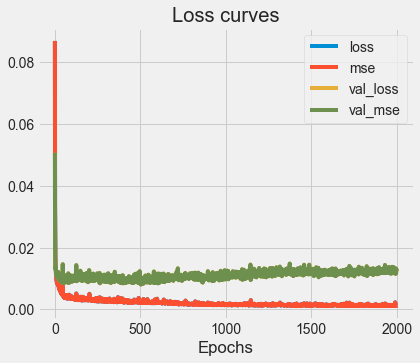

In [190]:
pd.DataFrame(history.history).plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title('Loss curves')
plt.legend();

In [191]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [192]:
hist

,loss,mse,val_loss,val_mse,epoch
0,0.086967,0.086967,0.050716,0.050716,0
1,0.033130,0.033130,0.020341,0.020341,1
2,0.021814,0.021814,0.016316,0.016316,2
3,0.016391,0.016391,0.013119,0.013119,3
4,0.014560,0.014560,0.013776,0.013776,4
...,...,...,...,...,...
1995,0.001298,0.001298,0.011823,0.011823,1995
1996,0.001212,0.001212,0.011687,0.011687,1996
1997,0.001244,0.001244,0.012571,0.012571,1997
1998,0.001175,0.001175,0.012981,0.012981,1998


In [193]:
# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


Final Root Mean Square Error on validation set: 0.112


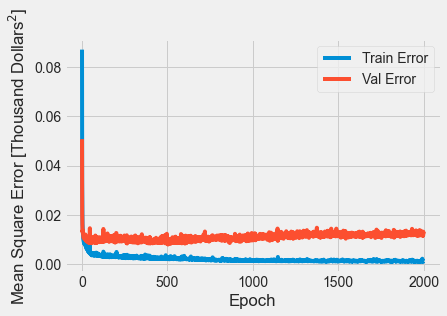

In [194]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    #plt.ylim([0,50])

plot_history()

In [195]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = model.predict(X_train)





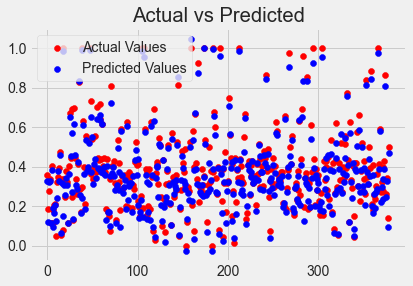

In [196]:
plt.figure()
plt.scatter(range(len(y_train)),y_train,color='red',label='Actual Values')
plt.scatter(range(len(prediction_train)),prediction_train,color='blue',label='Predicted Values')
plt.title('Actual vs Predicted')
plt.legend();


In [197]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = model.predict(X_test)




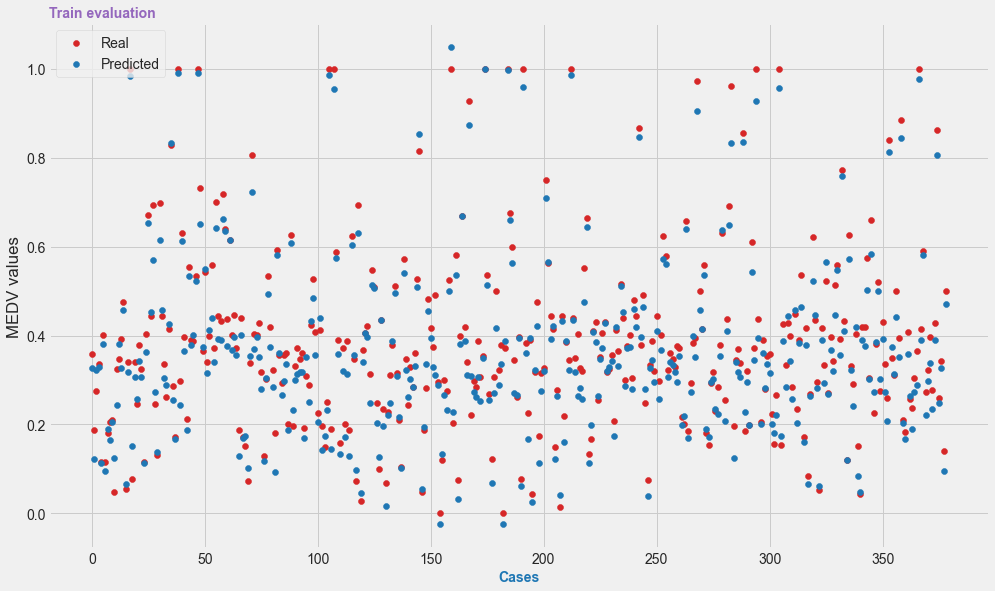

In [198]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

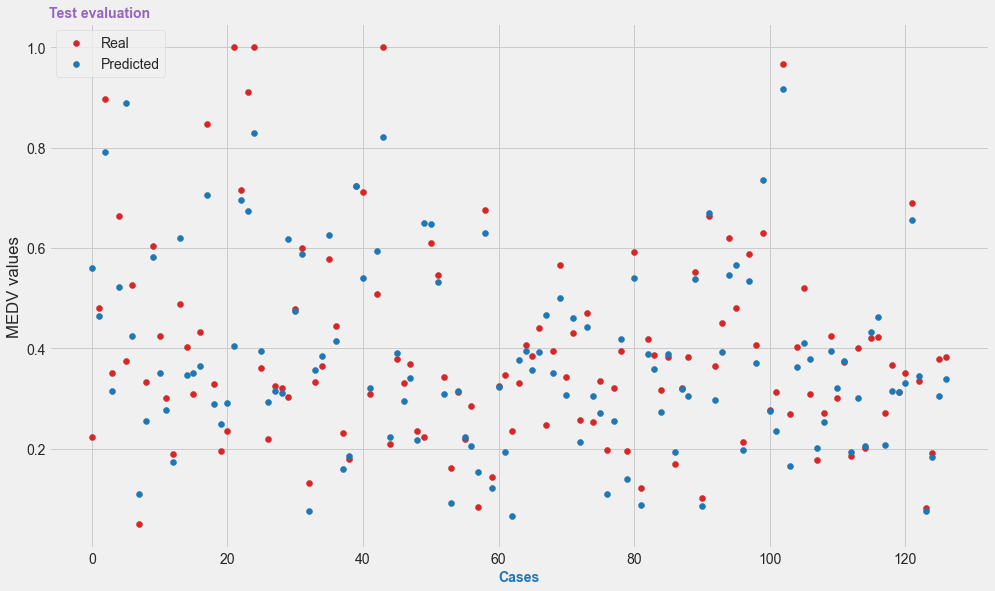

In [199]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

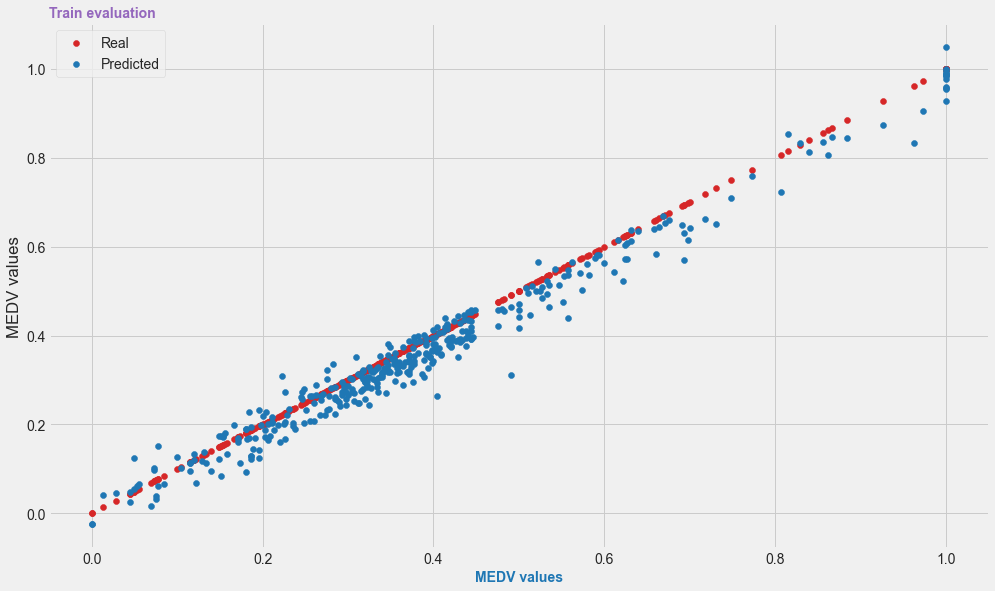

In [200]:
import matplotlib.pyplot as plt  # TRAINING

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

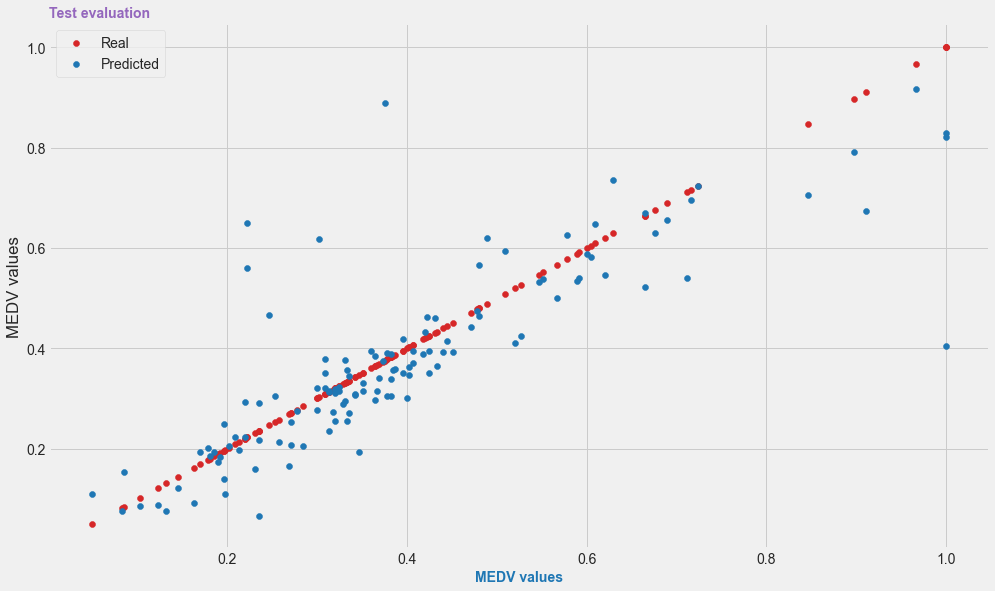

In [201]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

<AxesSubplot:ylabel='Density'>

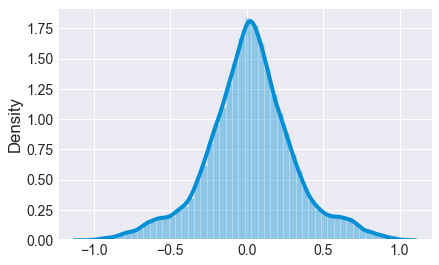

In [202]:
# Error in training
sns.set_style('darkgrid')
sns.distplot(y_train.to_numpy()-prediction_train)


<AxesSubplot:ylabel='Density'>

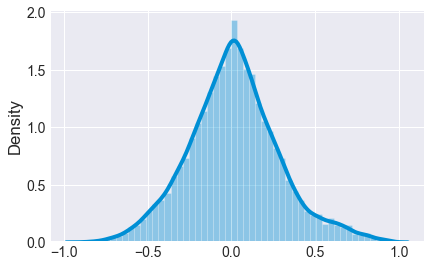

In [203]:
# Error in test

sns.set_style('darkgrid')
sns.distplot(y_test.to_numpy()-prediction_test)